In [537]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler


In [538]:
#Loading dataset
studentData = pd.read_csv(r'C:\Users\Aviva\Desktop\student-por.csv')
studentData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [539]:
# There are no null values
studentData.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

## I chose to predict student success to be represented by their grade point average ('total_grades')

In [540]:
studentData["total_grades"]=(studentData["G1"]+studentData["G2"]+studentData["G3"])/3


In [541]:
studentData["total_grades"]

0       7.333333
1      10.333333
2      12.333333
3      14.000000
4      12.333333
         ...    
644    10.333333
645    15.333333
646    10.666667
647    10.000000
648    10.666667
Name: total_grades, Length: 649, dtype: float64

In [542]:
#Dropping columns

stu1=studentData.drop(["G1","G2","G3"],axis=1)

In [543]:
stu1.shape

(649, 31)

In [544]:
stu1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        649 non-null    object 
 1   sex           649 non-null    object 
 2   age           649 non-null    int64  
 3   address       649 non-null    object 
 4   famsize       649 non-null    object 
 5   Pstatus       649 non-null    object 
 6   Medu          649 non-null    int64  
 7   Fedu          649 non-null    int64  
 8   Mjob          649 non-null    object 
 9   Fjob          649 non-null    object 
 10  reason        649 non-null    object 
 11  guardian      649 non-null    object 
 12  traveltime    649 non-null    int64  
 13  studytime     649 non-null    int64  
 14  failures      649 non-null    int64  
 15  schoolsup     649 non-null    object 
 16  famsup        649 non-null    object 
 17  paid          649 non-null    object 
 18  activities    649 non-null    

# Let’s find the correlation of the data columns and 'total_grades'

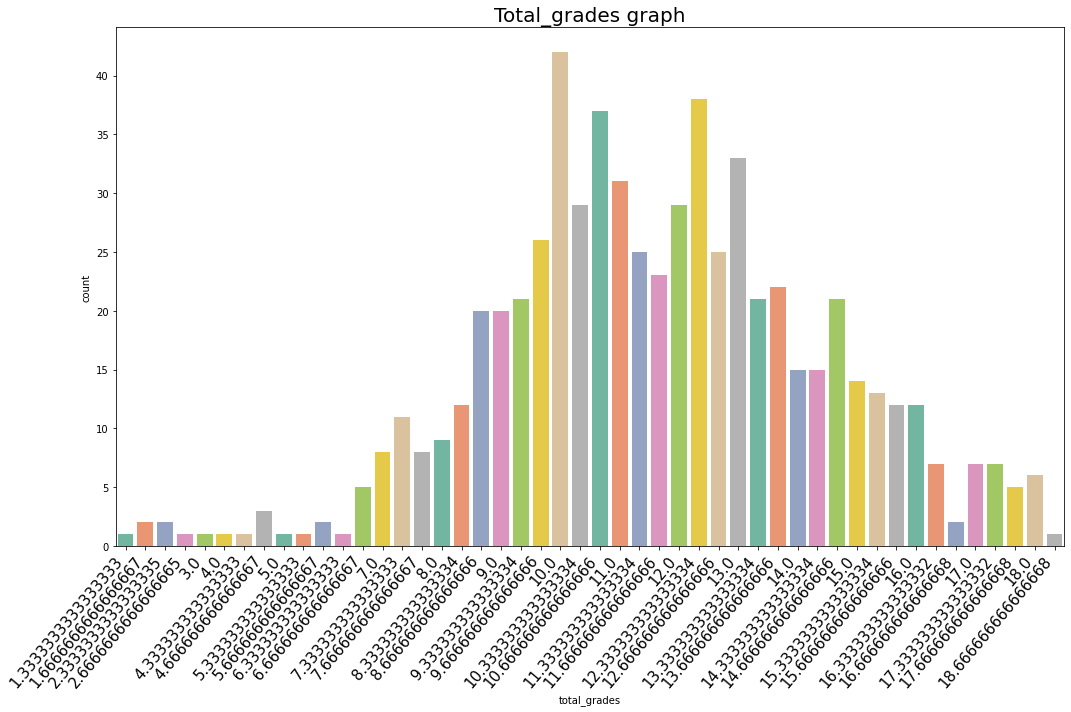

In [545]:
#Draw graph to represent information of 'total_grades'

plt.figure(figsize=(15,10))
ax = sns.countplot(x='total_grades', data=stu1,palette="Set2",)
plt.title("Total_grades graph", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize=15)
plt.tight_layout()
plt.show()

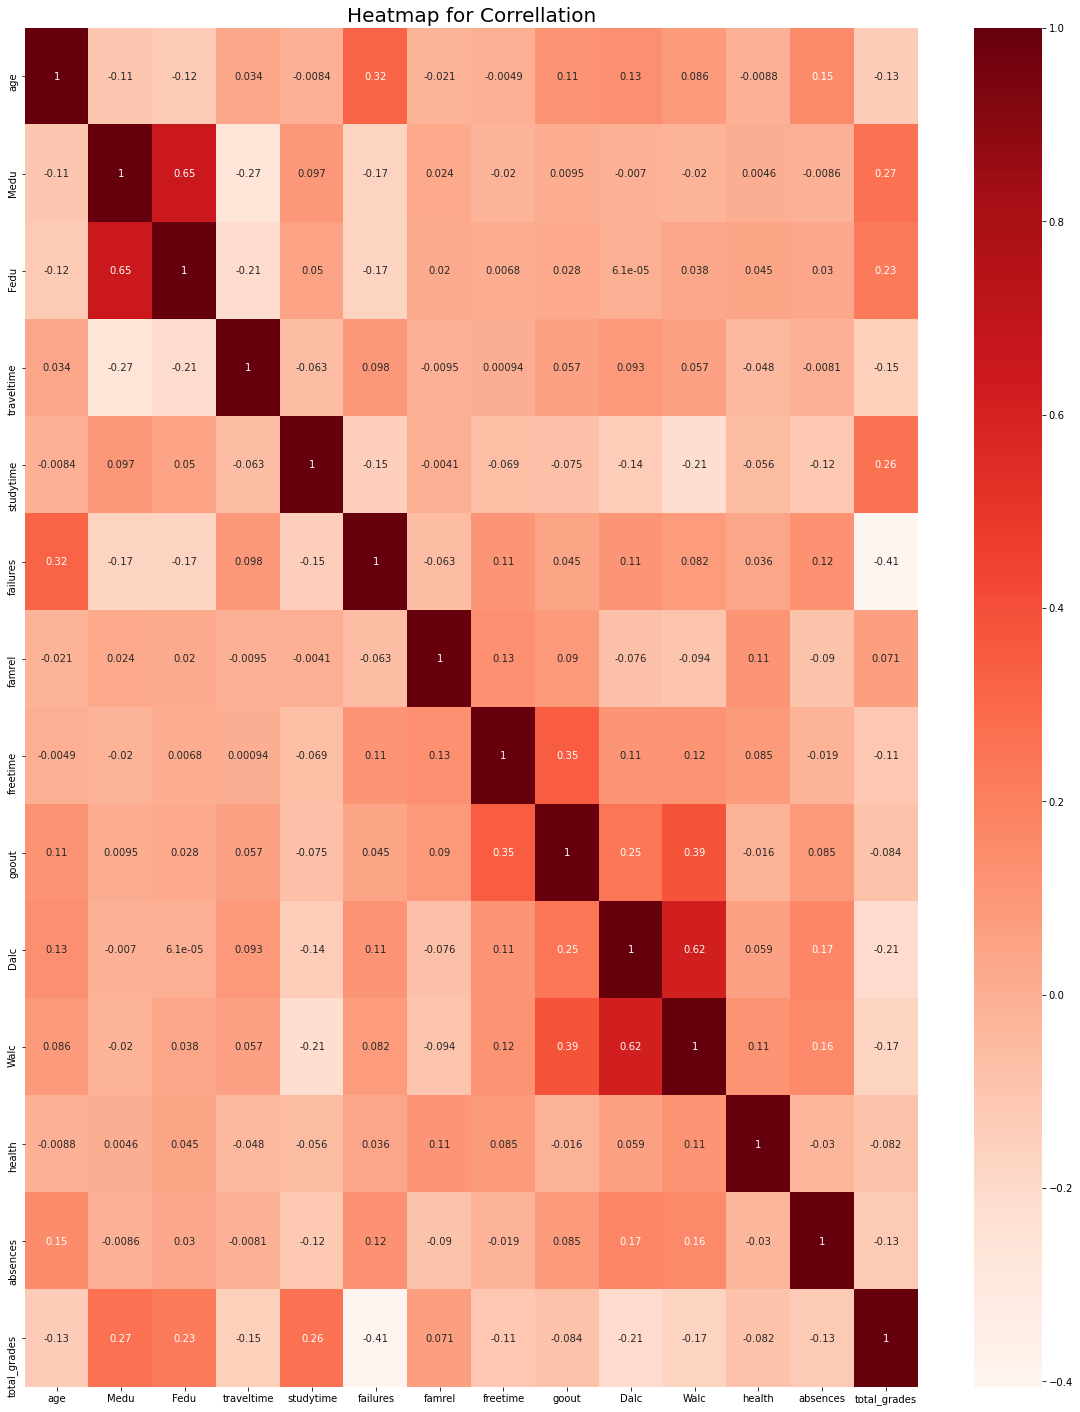

In [546]:
corr_matrix=stu1.corr()

plt.figure(figsize=(20,25))
sns.heatmap(corr_matrix,annot=True,cmap="Reds")
plt.title("Heatmap for Correllation", fontsize=20)
plt.show()

we can see that the columns: 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'freetime', 'Dalc', 'Walc', 'absences', they have at least -+ 0.1 of correlation.

and the columns:  'Medu', 'Fedu', 'studytime', 'failures', 'Dalc', have at least -+ 0.2 of correlation.

In [547]:
#all the Weak factor (less than -+0.1) we will remove from 'stu1'

stu1=stu1.drop(["famrel"],axis=1)
stu1=stu1.drop(["goout"],axis=1)
stu1=stu1.drop(["health"],axis=1)

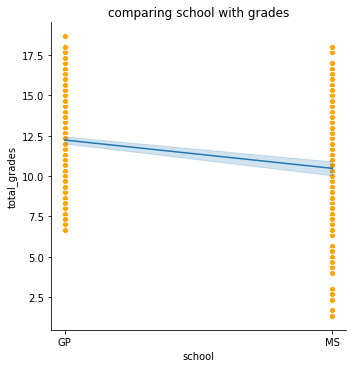

In [548]:
#comparing school with grades

sns.relplot(x="school", y="total_grades", data=stu1,color='orange')
sns.lineplot(x="school", y="total_grades", data=stu1,)
plt.title("comparing school with grades")
plt.show()

#so by graph we know that school has impact on grades of students

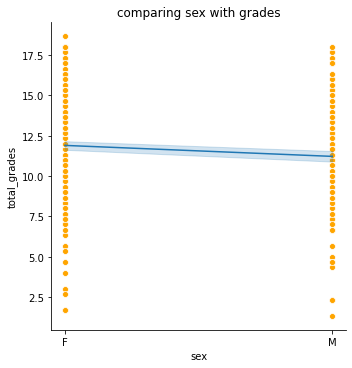

In [549]:
#comparing sex with grades

sns.relplot(x="sex", y="total_grades", data=stu1,color='orange')
sns.lineplot(x="sex", y="total_grades", data=stu1,)
plt.title("comparing sex with grades")
plt.show()


#so by graph we know that sex has small impact on grades of students, then we will remove it from 'stu1'

stu1=stu1.drop(["sex"],axis=1)

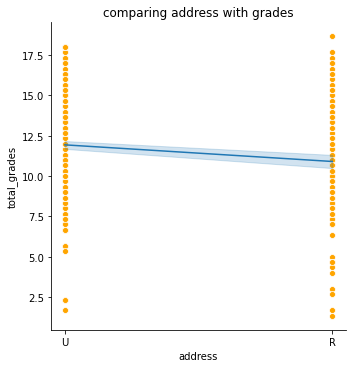

In [550]:
#comparing address with grades

sns.relplot(x="address", y="total_grades", data=stu1,color='orange')
sns.lineplot(x="address", y="total_grades", data=stu1,)
plt.title("comparing address with grades")
plt.show()

#address is factor for the grades

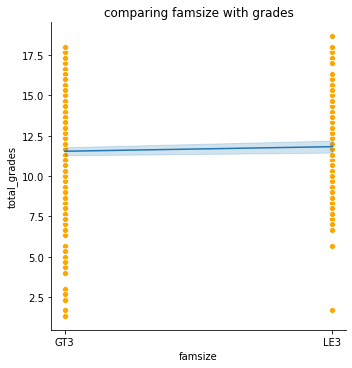

In [551]:
#comparing famsize with grades
#famsize = family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

sns.relplot(x="famsize", y="total_grades", data=stu1,color='orange')
sns.lineplot(x="famsize", y="total_grades", data=stu1,)
plt.title("comparing famsize with grades")
plt.show()

#famsize is factor for the grades

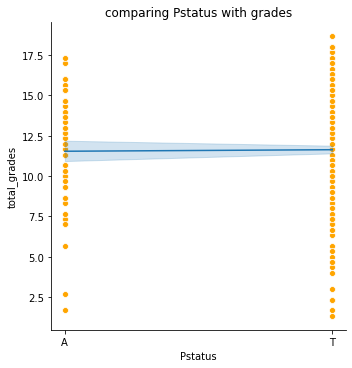

In [552]:
#comparing pstatus with grades
#Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

sns.relplot(x="Pstatus", y="total_grades", data=stu1,color='orange')
sns.lineplot(x="Pstatus", y="total_grades", data=stu1,)
plt.title("comparing Pstatus with grades")
plt.show()

#it is not a good factor, then we will remove it from 'stu1'

stu1=stu1.drop(["Pstatus"],axis=1)

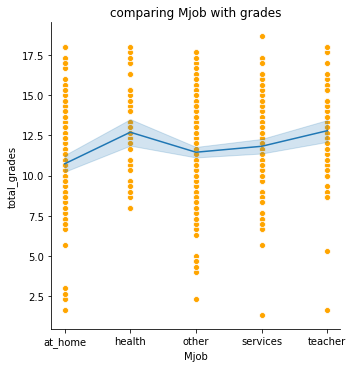

In [553]:
#comparing Mjob
#Mjob = mother's job 
#(nominal: 'teacher', 'health' care related, civil 'services' 
#(e.g. administrative or police), 'at_home' or 'other')

sns.relplot(x="Mjob", y="total_grades", data=stu1,color='orange')
sns.lineplot(x="Mjob", y="total_grades", data=stu1,)
plt.title("comparing Mjob with grades")
plt.show()

#Mjob is factor for the grades

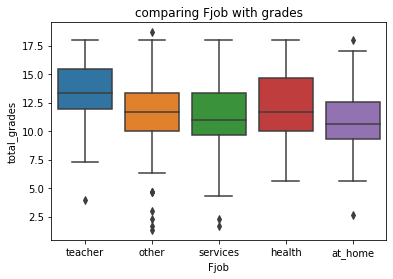

In [554]:
#comparing Fjob
#Fjob = father's job (nominal: 'teacher', 'health' care related, civil 'services' 
#(e.g. administrative or police), 'at_home' or 'other')

sns.boxplot(x="Fjob", y="total_grades", data=stu1)
plt.title("comparing Fjob with grades")
plt.show()

#Fjob is factor for the grades

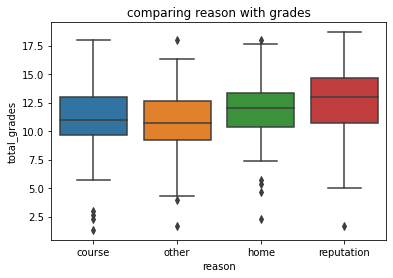

In [555]:
#comparing reasons
#reason - reason to choose this school 
#(nominal: close to 'home', school 'reputation', 'course' preference or 'other')

sns.boxplot(x="reason", y="total_grades", data=stu1)
plt.title("comparing reason with grades")
plt.show()

#reason is factor for the grades

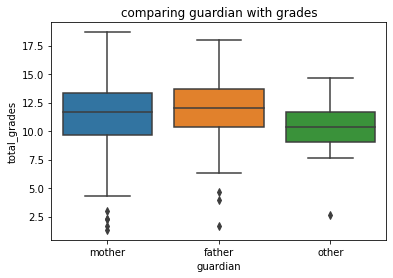

In [556]:
#comparing guardians

sns.boxplot(x="guardian", y="total_grades", data=stu1)
plt.title("comparing guardian with grades")
plt.show()

#guardian is factor for the grades

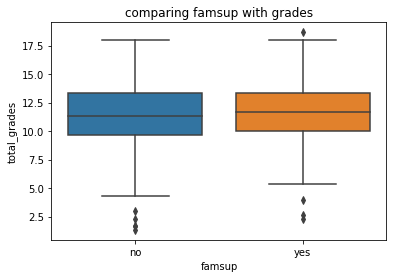

In [557]:
#comparing support of family

sns.boxplot(x="famsup", y="total_grades", data=stu1)
plt.title("comparing famsup with grades")
plt.show()

#it is not a good factor, then we will remove it from 'stu1'

stu1=stu1.drop(["famsup"],axis=1)

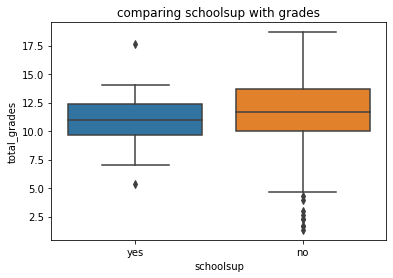

In [558]:
#comparing support of school

sns.boxplot(x="schoolsup", y="total_grades", data=stu1)
plt.title("comparing schoolsup with grades")
plt.show()

#schoolsup is factor for the grades

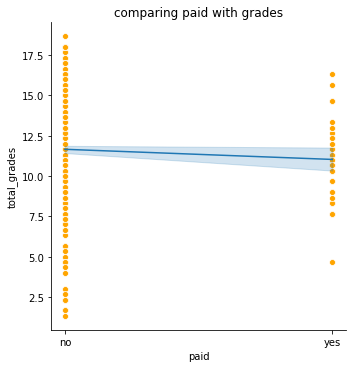

In [559]:
#comparing paid attributes
#paid = extra paid classes within the course subject(binary: yes or no)

sns.relplot(x="paid", y="total_grades", data=stu1,color='orange')
sns.lineplot(x="paid", y="total_grades", data=stu1,)
plt.title("comparing paid with grades")
plt.show()

#paid is factor for the grades

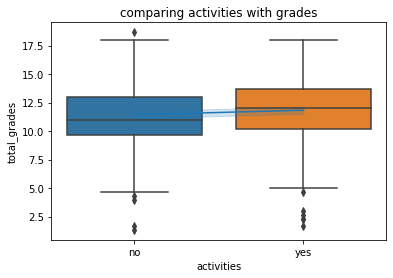

In [560]:
#comparing activities attributes
# activities = extra-curricular activities (binary: yes or no)

sns.boxplot(x="activities", y="total_grades", data=stu1)
sns.lineplot(x="activities", y="total_grades", data=stu1,)
plt.title("comparing activities with grades")
plt.show()

#activities is factor for the grades

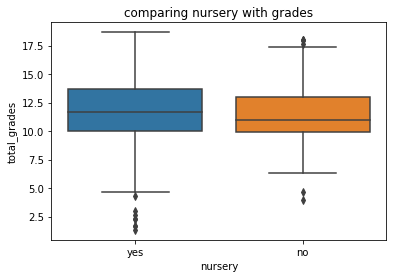

In [561]:
#comparing nursery attributes
#nursery = attended nursery school (binary: yes or no)

sns.boxplot(x="nursery", y="total_grades", data=stu1)
#sns.lineplot(x="nursery", y="total_grades", data=stu1,)
plt.title("comparing nursery with grades")
plt.show()

#nursery is factor for the grades

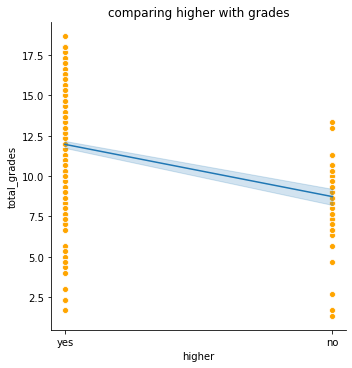

In [562]:
#comparing higher attributes
#higher = wants to take higher education (binary: yes or no)

sns.relplot(x="higher", y="total_grades", data=stu1,color='orange')
sns.lineplot(x="higher", y="total_grades", data=stu1,)
plt.title("comparing higher with grades")
plt.show()

#higher is factor for the grades

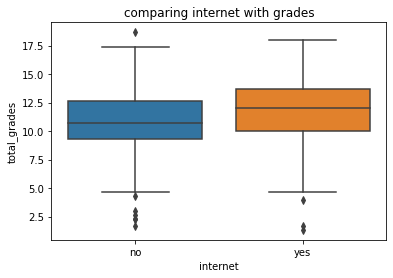

In [563]:
#comparing internet attributes

sns.boxplot(x="internet", y="total_grades", data=stu1)
plt.title("comparing internet with grades")
plt.show()

#internet is factor for the grades

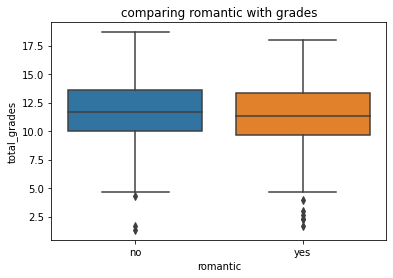

In [564]:
#comparing romantic attributes
#romantic = with a romantic relationship (binary: yes or no)

sns.boxplot(x="romantic", y="total_grades", data=stu1)
plt.title("comparing romantic with grades")
plt.show()

#romantic is factor for the grades

In [565]:
studentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        649 non-null    object 
 1   sex           649 non-null    object 
 2   age           649 non-null    int64  
 3   address       649 non-null    object 
 4   famsize       649 non-null    object 
 5   Pstatus       649 non-null    object 
 6   Medu          649 non-null    int64  
 7   Fedu          649 non-null    int64  
 8   Mjob          649 non-null    object 
 9   Fjob          649 non-null    object 
 10  reason        649 non-null    object 
 11  guardian      649 non-null    object 
 12  traveltime    649 non-null    int64  
 13  studytime     649 non-null    int64  
 14  failures      649 non-null    int64  
 15  schoolsup     649 non-null    object 
 16  famsup        649 non-null    object 
 17  paid          649 non-null    object 
 18  activities    649 non-null    

# Preprocessing Data for performing Machine learning algorithms


In [566]:
studentData_dummies = pd.get_dummies(studentData,columns=['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic'])
                                     
                                     
stu1_dummies=pd.get_dummies(stu1,columns=["school","address","famsize","Mjob","Fjob","reason",
                                          "guardian", "nursery", "paid",'schoolsup', 'activities',
                                          'higher', 'internet', 'romantic' ])

In [567]:
#studentData_dummies - the full data

print(studentData_dummies.shape)
studentData_dummies.info()

(649, 60)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                649 non-null    int64  
 1   Medu               649 non-null    int64  
 2   Fedu               649 non-null    int64  
 3   traveltime         649 non-null    int64  
 4   studytime          649 non-null    int64  
 5   failures           649 non-null    int64  
 6   famrel             649 non-null    int64  
 7   freetime           649 non-null    int64  
 8   goout              649 non-null    int64  
 9   Dalc               649 non-null    int64  
 10  Walc               649 non-null    int64  
 11  health             649 non-null    int64  
 12  absences           649 non-null    int64  
 13  G1                 649 non-null    int64  
 14  G2                 649 non-null    int64  
 15  G3                 649 non-null    int64  
 16  total_grades    

In [568]:
#stu1_dummies - the reduced data

print(stu1_dummies.shape)
stu1_dummies.info()

(649, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                649 non-null    int64  
 1   Medu               649 non-null    int64  
 2   Fedu               649 non-null    int64  
 3   traveltime         649 non-null    int64  
 4   studytime          649 non-null    int64  
 5   failures           649 non-null    int64  
 6   freetime           649 non-null    int64  
 7   Dalc               649 non-null    int64  
 8   Walc               649 non-null    int64  
 9   absences           649 non-null    int64  
 10  total_grades       649 non-null    float64
 11  school_GP          649 non-null    uint8  
 12  school_MS          649 non-null    uint8  
 13  address_R          649 non-null    uint8  
 14  address_U          649 non-null    uint8  
 15  famsize_GT3        649 non-null    uint8  
 16  famsize_LE3     

In [569]:
#x,y for stu1_dummies - the reduced data
x = stu1_dummies.drop(['total_grades'],axis=1)
y = stu1_dummies['total_grades']

#x,y for studentData_dummies - the full data
x_fuData = studentData_dummies.drop(['total_grades','G1','G2','G3'],axis=1)
y_fuData = studentData_dummies['total_grades']


print("the reduced data:")
print(x.shape)
print(y.head())


print("the full data:")
print(x_fuData.shape)
print(y_fuData.head())

the reduced data:
(649, 47)
0     7.333333
1    10.333333
2    12.333333
3    14.000000
4    12.333333
Name: total_grades, dtype: float64
the full data:
(649, 56)
0     7.333333
1    10.333333
2    12.333333
3    14.000000
4    12.333333
Name: total_grades, dtype: float64


In [570]:
#Applying Standard scaling to all the numeric columns of 'stu1_dummies'
#I chose to use StandardScaler because it is less affected by outliers (less than Normalization)

numeric_vars = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
               'freetime', 'Dalc', 'Walc', 'absences']

x_stu1_Scale=x
sc = StandardScaler()
x_stu1_Scale[numeric_vars] = sc.fit_transform(x_stu1_Scale[numeric_vars])


In [571]:
#Applying Standard scaling to all the numeric columns of 'studentData_dummies'
#I chose to use StandardScaler because it is less affected by outliers (less than Normalization)

numeric_vars = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
               'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

x_fuData_Scale=x_fuData
sc = StandardScaler()
x_fuData_Scale[numeric_vars] = sc.fit_transform(x_fuData_Scale[numeric_vars])


In [572]:
#Train and Test splitting of data 

#splitting for stu1_dummies - the reduced data
x_train, x_test, y_train, y_test = train_test_split(x_stu1_Scale, y, test_size = 0.2, random_state = 42)

#splitting for studentData_dummies - the full data
x_trainFul, x_testFul, y_trainFul, y_testFul = train_test_split(x_fuData_Scale, y_fuData, test_size = 0.2, random_state = 42)


In [573]:
x_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,freetime,Dalc,Walc,absences,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
332,1.031695,-0.453954,-0.278983,-0.760032,1.290114,-0.374305,-0.171647,-0.543555,-0.218508,-0.789159,...,1,0,1,0,0,1,0,1,1,0
29,-0.611422,1.310216,1.540715,-0.760032,0.083653,-0.374305,0.780478,3.784879,2.119051,0.073433,...,1,0,0,1,0,1,0,1,0,1
302,1.031695,0.428131,-0.278983,-0.760032,1.290114,-0.374305,-0.171647,-0.543555,-0.997695,-0.357863,...,1,0,0,1,0,1,1,0,1,0
286,0.210137,-0.453954,-1.188832,-0.760032,-1.122808,-0.374305,0.780478,0.538553,1.339864,-0.789159,...,1,0,1,0,0,1,0,1,1,0
554,0.210137,-1.336039,-1.188832,0.576718,-1.122808,-0.374305,1.732603,0.538553,-0.218508,-0.142215,...,1,0,0,1,1,0,0,1,0,1


In [574]:
x_trainFul.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
332,1.031695,-0.453954,-0.278983,-0.760032,1.290114,-0.374305,0.072606,-0.171647,-0.157380,-0.543555,...,1,0,0,1,0,1,0,1,1,0
29,-0.611422,1.310216,1.540715,-0.760032,0.083653,-0.374305,0.072606,0.780478,1.544950,3.784879,...,0,1,0,1,0,1,0,1,0,1
302,1.031695,0.428131,-0.278983,-0.760032,1.290114,-0.374305,1.119748,-0.171647,-1.008546,-0.543555,...,0,1,1,0,0,1,1,0,1,0
286,0.210137,-0.453954,-1.188832,-0.760032,-1.122808,-0.374305,0.072606,0.780478,-1.008546,0.538553,...,1,0,1,0,0,1,0,1,1,0
554,0.210137,-1.336039,-1.188832,0.576718,-1.122808,-0.374305,-0.974536,1.732603,1.544950,0.538553,...,0,1,0,1,1,0,0,1,0,1


# Our training and testing data is ready now to perform machine learning algorithm
- We will now try to improve the model with a few changes

####  Linear Regression of 'stu1_dummies' - the reduced data

In [575]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)

# Predicting the Test set results
y_pred_Lr= Lr.predict(x_test)

r2Lr=r2_score(y_test,y_pred_Lr)  
print("The r-squared of 'stu1_dummies' on 'Lr' model is: ",r2Lr)

The r-squared of 'stu1_dummies' on 'Lr' model is:  0.1626925131560113


#### Linear Regression of 'studentData_dummies' - the full data before reduced 

In [576]:
LrFul=LinearRegression()
LrFul.fit(x_trainFul,y_trainFul)

# Predicting the Test set results
y_pred_LrFul= LrFul.predict(x_testFul)

r2_LrFul=r2_score(y_testFul,y_pred_LrFul)  
print("The r-squared of 'stu1_dummies' on 'LrFul' model is: ",r2_LrFul)

The r-squared of 'stu1_dummies' on 'LrFul' model is:  0.15644629890838435


#### Cross-Validation with Linear Regression for the 'studentData_dummies' - the full data before reduced 

In [577]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 56))}]


# step-3: perform grid search
# 3.1 specify model
LrCV = LinearRegression()
LrCV.fit(x_trainFul, y_trainFul)
rfe = RFE(LrCV)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        
                        return_train_score=True)      

# fit the model
model_cv.fit(x_trainFul, y_trainFul)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2')

In [578]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.226305,0.028671,0.009573,0.001018,1,{'n_features_to_select': 1},-0.052781,-0.008645,0.168034,-0.017955,...,0.017840,0.077236,54,0.022205,0.010572,0.112968,0.030612,0.006369,0.036545,0.039157
1,0.196801,0.014867,0.008977,0.001093,2,{'n_features_to_select': 2},-0.031644,-0.037055,0.168034,-0.022271,...,0.012922,0.078008,55,0.053461,0.017668,0.112968,0.068648,0.010187,0.052586,0.037207
2,0.184210,0.038753,0.007381,0.000489,3,{'n_features_to_select': 3},-0.014599,-0.037055,0.158588,0.002113,...,0.018925,0.070934,53,0.067218,0.017668,0.119756,0.073564,0.012917,0.058225,0.039497
3,0.209246,0.033451,0.007779,0.000746,4,{'n_features_to_select': 4},-0.001997,-0.037055,0.182003,-0.021291,...,0.021448,0.081072,52,0.077648,0.017668,0.136242,0.061326,0.012917,0.061160,0.045007
4,0.166174,0.032694,0.008081,0.001196,5,{'n_features_to_select': 5},0.059741,-0.008857,0.227881,0.019970,...,0.035722,0.113160,51,0.095991,0.033327,0.151041,0.057841,-0.041171,0.059406,0.064084


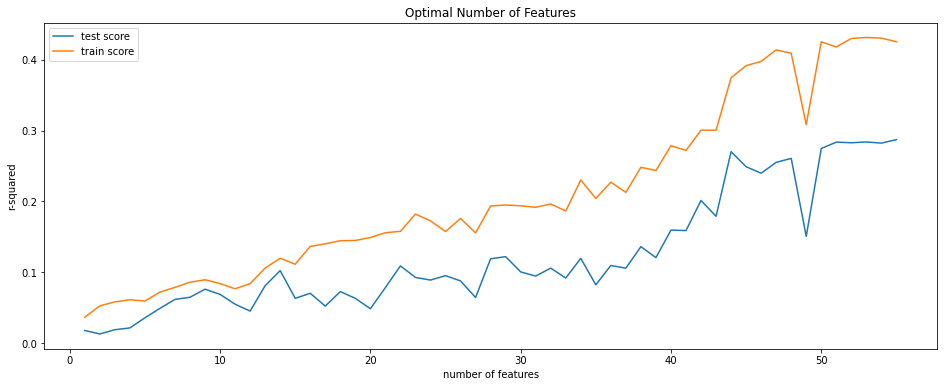

In [579]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

In [580]:
# final model
n_features_optimal = 45

LrCV = LinearRegression()
LrCV.fit(x_trainFul, y_trainFul)

rfe = RFE(LrCV, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_trainFul, y_trainFul)

# predict of x_test
y_pred_LrFul_CV = rfe.predict(x_testFul)
r2_LrFul_CV = r2_score(y_testFul, y_pred_LrFul_CV)
print("The r-squared of Linear Regression with Cross-Validation for the 'studentData_dummies' is: ",r2_LrFul_CV)

The r-squared of Linear Regression with Cross-Validation for the 'studentData_dummies' is:  0.19102538966953053


####  Dummy Regressor of 'studentData_dummies' - the full data

In [581]:
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(x_trainFul,y_trainFul)
    
# Predicting the Test set results
y_pred_dummy= dummy_regr.predict(x_testFul)

r2_dummy = r2_score(y_testFul,y_pred_dummy) 
print("The r-squared for the 'studentData_dummies' is: ",r2_dummy)

The r-squared for the 'studentData_dummies' is:  -0.045804795586673386


# Final Results - Model Comparision

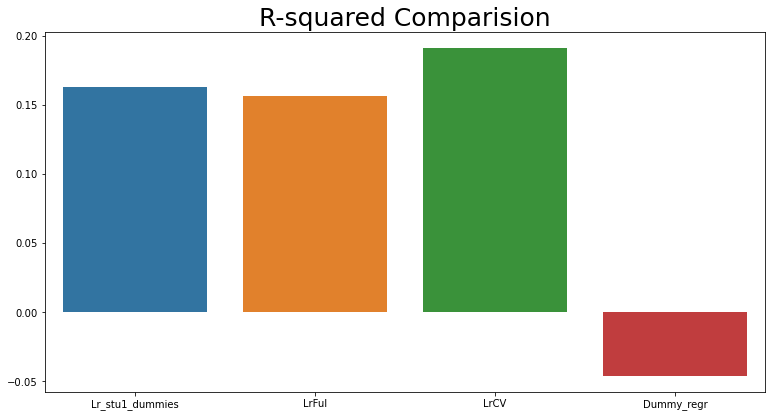

In [582]:
Models = ["Lr_stu1_dummies", "LrFul", "LrCV", "Dummy_regr"]
r2List = [r2Lr,r2_LrFul,r2_LrFul_CV,r2_dummy]

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
x = Models
y = r2List
sns.barplot(x=x, y=y)
plt.title("R-squared Comparision",fontsize=25)
plt.show()